In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from condition import get_function, get_function_as_string, get_gradient, get_hessian
from methods.enumeration import enumeration
from methods.newton import newton
from utils import count_data, decimal_places

In [2]:
interval_x1 = (-3, 2)
interval_x2 = (0, 7)
accuracy = 0.01
x0 = (-3, 0)

f = get_function()
gradient = get_gradient()
hessian = get_hessian()

In [3]:
print(f"Исходная функция: {get_function_as_string()}")
print(f"Области значени X1 от {interval_x1[0]} до {interval_x1[1]}")
print(f"Области значени X2 от {interval_x2[0]} до {interval_x2[1]}")
print(f"Точность метода: {accuracy}")

Исходная функция: (x1 + x2 - 1)**2 + x1**2 - 2 * x2
Области значени X1 от -3 до 2
Области значени X2 от 0 до 7
Точность метода: 0.01


In [4]:
n = count_data(accuracy)
X, Y = np.meshgrid(np.linspace(interval_x1[0], interval_x1[1], n), 
                   np.linspace(interval_x2[0], interval_x2[1], n))
Z = f(X, Y)

Нахождения минимума методом перебора

(x1*, x2*) = (-0.998, 2.999)
f(x1*, x2*) = -4.0
Выполнено за 1.792014 секунд


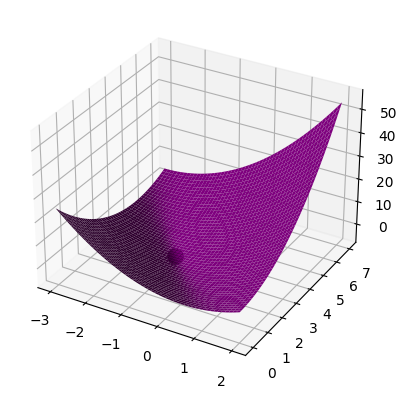

In [5]:
print("Нахождения минимума методом перебора\n")

projection3D = plt.figure()
axes_of_projection3D = projection3D.add_subplot(projection="3d")

axes_of_projection3D.plot_surface(X, Y, Z, color="purple")

start = datetime.now()
min_x1_x2 = enumeration(interval_x1, interval_x2, f, accuracy)
end = datetime.now()

print(f"(x1*, x2*) = ({round(min_x1_x2[0], decimal_places(accuracy))}, {round(min_x1_x2[1], decimal_places(accuracy))})")
print(f"f(x1*, x2*) = {round(f(min_x1_x2[0], min_x1_x2[1]), decimal_places(accuracy))}")
print(f"Выполнено за {end.second - start.second + (end.microsecond - start.microsecond) / 1_000_000} секунд")

axes_of_projection3D.scatter(min_x1_x2[0], min_x1_x2[1], f(min_x1_x2[0], min_x1_x2[1]), s=121, color="black")
plt.show()

Нахождения минимума методом Ньютона

(x1*, x2*) = (-1.0, 3.0)
f(x1*, x2*) = -4.0
Выполнено за 0.000291 секунд


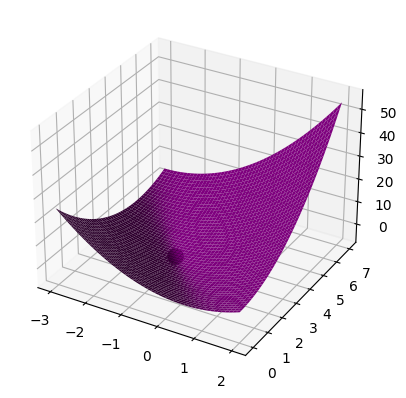

In [6]:
print("Нахождения минимума методом Ньютона\n")

projection3D = plt.figure()
axes_of_projection3D = projection3D.add_subplot(projection="3d")

axes_of_projection3D.plot_surface(X, Y, Z, color="purple")

start = datetime.now()
min_x1_x2 = newton(x0, gradient, hessian, accuracy)
end = datetime.now()

print(f"(x1*, x2*) = ({round(min_x1_x2[0], decimal_places(accuracy))}, {round(min_x1_x2[1], decimal_places(accuracy))})")
print(f"f(x1*, x2*) = {round(f(min_x1_x2[0], min_x1_x2[1]), decimal_places(accuracy))}")
print(f"Выполнено за {end.second - start.second + (end.microsecond - start.microsecond) / 1_000_000} секунд")

axes_of_projection3D.scatter(min_x1_x2[0], min_x1_x2[1], f(min_x1_x2[0], min_x1_x2[1]), s=121, color="black")
plt.show()